In [1]:
import pandas as pd
import numpy as np
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import nbinom
from scipy.stats import hypergeom
from scipy.stats import poisson
from math import factorial
from decimal import Decimal
import matplotlib.pyplot as plt

alturas = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")
alturas

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [2]:
alturas.Height

0      174
1      189
2      185
3      195
4      149
      ... 
495    150
496    184
497    141
498    150
499    173
Name: Height, Length: 500, dtype: int64

In [3]:
sucessos = alturas[alturas.Height > 170]
sucessos

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
5,Male,189,104,3
...,...,...,...,...
488,Male,198,136,4
489,Female,179,150,5
492,Female,198,50,0
496,Female,184,121,4


In [4]:
fracassos = alturas[alturas.Height <= 170]
fracassos

,Gender,Height,Weight,Index
4,Male,149,61,3
6,Male,147,92,5
7,Male,154,111,5
9,Female,169,103,4
11,Female,159,80,4
...,...,...,...,...
493,Female,170,53,1
494,Male,152,98,5
495,Female,150,153,5
497,Female,141,136,5


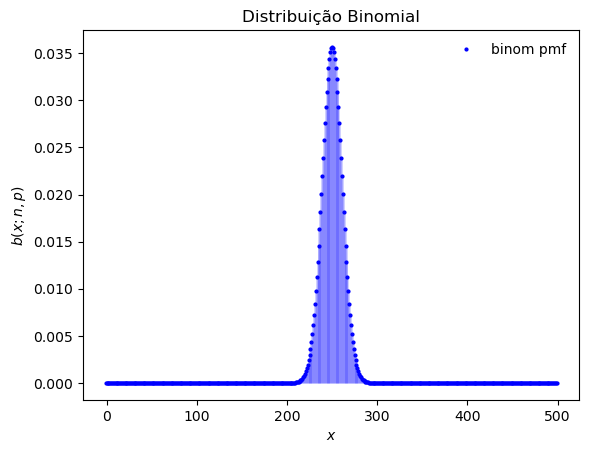

In [5]:
fig, ax = plt.subplots(1, 1)
n, p = 500, 0.5
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
x = np.arange(binom.ppf(0, n, p),
              binom.ppf(1, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=2, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=2, alpha=0.2)
rv = binom(n, p)
plt.xlabel("$x$")
plt.ylabel("$b(x; n, p)$")
plt.title("Distribuição Binomial")
ax.legend(loc='best', frameon=False)
plt.show()

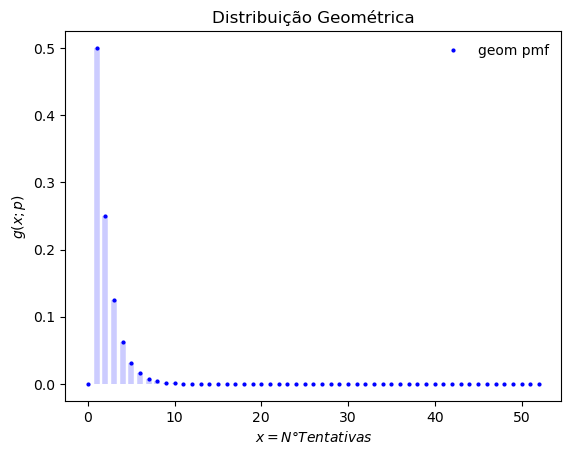

In [21]:
p = 250/500
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = geom.stats(p, moments='mvsk')
x = np.arange(geom.ppf(0, p),
              geom.ppf(0.9999999999999999, p))
ax.plot(x, geom.pmf(x, p), 'bo', ms=2, label='geom pmf')
ax.vlines(x, 0, geom.pmf(x, p), colors='b', lw=4, alpha=0.2)
plt.ylabel("$g(x; p)$")
plt.xlabel("$x = N° Tentativas$")
plt.title("Distribuição Geométrica")
ax.legend(loc='best', frameon=False)
plt.show()

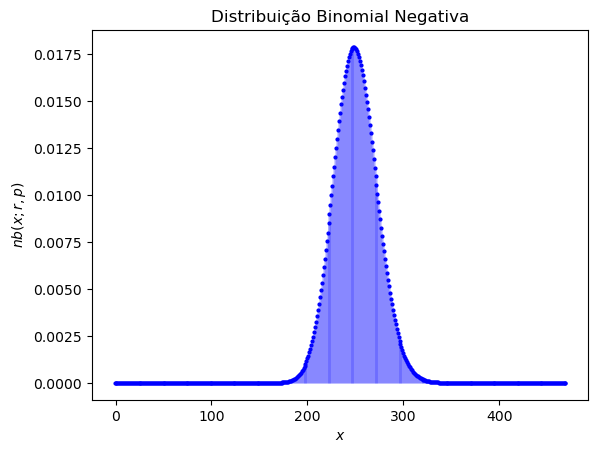

In [10]:
n = 250
p = 0.5
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = nbinom.stats(n, p, moments='mvsk')
x = np.arange(nbinom.ppf(0, n, p),
              nbinom.ppf(0.9999999999999999, n, p))
ax.plot(x, nbinom.pmf(x, n, p), 'bo', ms=2, label='nbinom pmf')
plt.xlabel("$x$")
plt.ylabel("$nb(x; r, p)$")
plt.title("Distribuição Binomial Negativa")
ax.vlines(x, 0, nbinom.pmf(x, n, p), colors='b', lw=2, alpha=0.2)
plt.show()

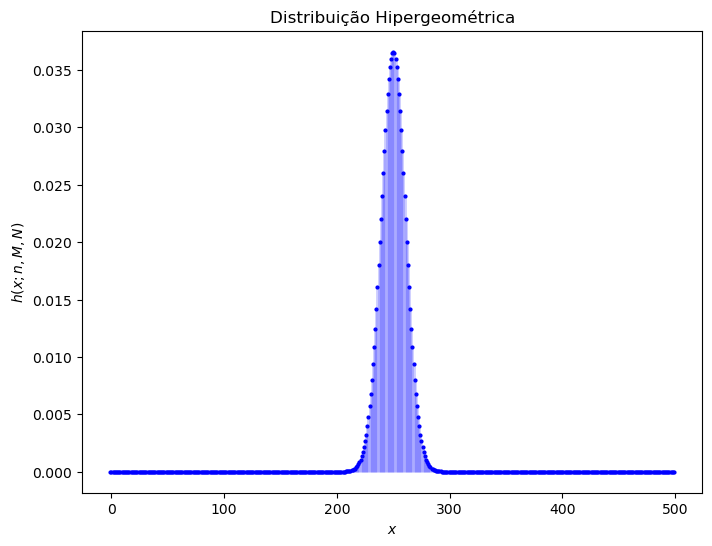

In [71]:
M = 5000
n = 500
N = 10000
x = np.arange(hypergeom.ppf(0, N, M, n),
              hypergeom.ppf(1, N, M, n))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(x, hypergeom.pmf(x, N, M, n), 'bo', ms=2)
ax.vlines(x, 0, hypergeom.pmf(x, N, M, n), colors='b', lw=2, alpha=0.2)
plt.xlabel("$x$")
plt.ylabel("$h(x; n, M, N)$")
plt.title("Distribuição Hipergeométrica")
plt.show()

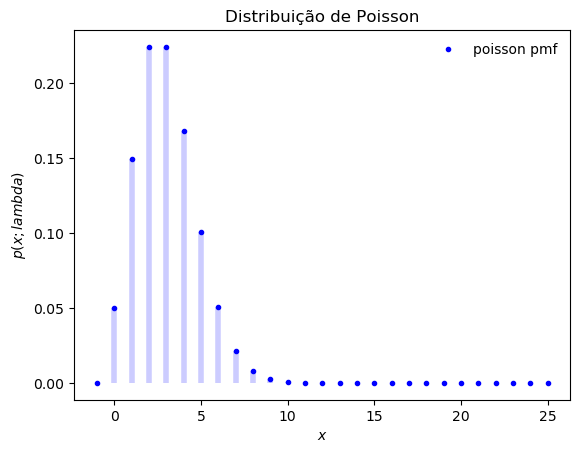

In [35]:
fig, ax = plt.subplots(1, 1)
mu = 3
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0, mu),
              poisson.ppf(0.9999999999999999, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=3, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=4, alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.xlabel("$x$")
plt.ylabel("$p(x; lambda)$")
plt.title("Distribuição de Poisson")
plt.show()